In [64]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

### Image properties 

In [65]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNEL=3
EPOCHS=50

### Load Data

In [66]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "Datasets",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [67]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [68]:
len(dataset)

68

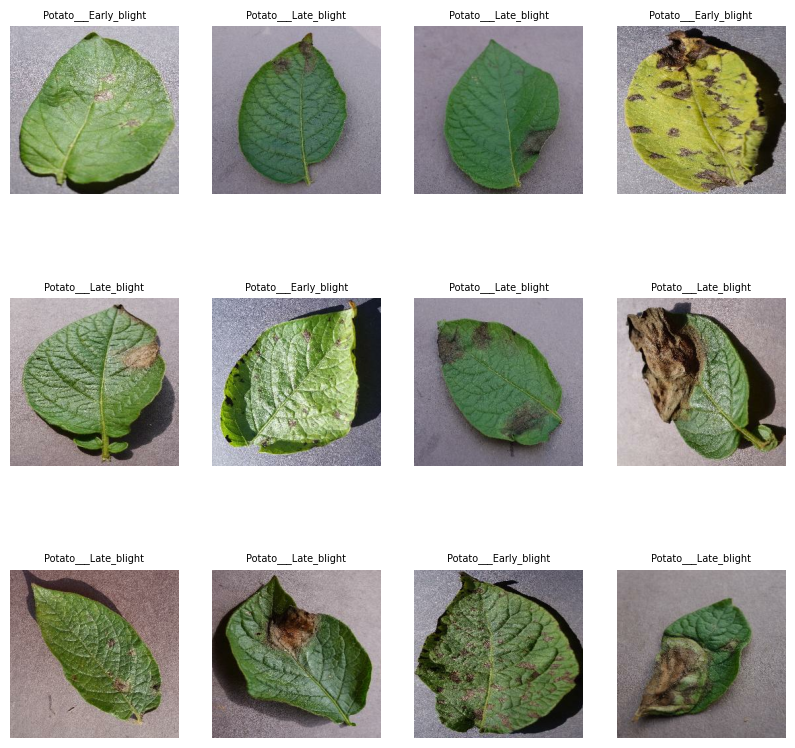

In [69]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    #print(image_batch.shape)#(32, 256, 256, 3)
    #print(label_batch.numpy())#[1 1 0 1 0 1 0 2 0 0 0 1 1 0 1 1 1 2 1 0 0 2 1 1 1 1 1 0 1 0 0 0]
    for i in range (12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]],fontsize=7)
        plt.axis("off")
    

In [70]:
len(dataset)

68

In [71]:
# 80% ==> training
# 20% ==> 10%validation, 10% test

In [77]:
def data_partitions(ds,train_split,val_split,test_split,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    test_size=int(test_split*ds_size)

    train_ds=ds.take(train_size)
    test_ds=ds.skip(train_size)
    val_ds=test_ds.take(val_size)
    test_ds=test_ds.skip(val_size)

    return train_ds,val_ds, test_ds
    

In [78]:
train_ds,val_ds,test_ds=data_partitions(dataset,0.8,0.1,0.1)

In [79]:
len(train_ds)

54

In [83]:
len(val_ds)

6

In [84]:
len(test_ds)

8

In [88]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [ ]:
tf.keras.Sequential[
    layers.experimental.preprocessing.Rescaling(1.0/255)
]